# Mining Collaboration Network

## Authors : KHAOULA HIDAWI , LAM NGUYEN

### University of Insubria , Varese, Italy

In [1]:
!pip install networkx matplotlib nltk


# Cloning the Github Repository 

In [2]:
!git clone https://github.com/scikit-learn/scikit-learn.git

Cloning into 'scikit-learn'...
Updating files:  47% (743/1569)
Updating files:  48% (754/1569)
Updating files:  49% (769/1569)
Updating files:  50% (785/1569)
Updating files:  51% (801/1569)
Updating files:  52% (816/1569)
Updating files:  53% (832/1569)
Updating files:  54% (848/1569)
Updating files:  55% (863/1569)
Updating files:  56% (879/1569)
Updating files:  57% (895/1569)
Updating files:  58% (911/1569)
Updating files:  59% (926/1569)
Updating files:  60% (942/1569)
Updating files:  61% (958/1569)
Updating files:  62% (973/1569)
Updating files:  63% (989/1569)
Updating files:  64% (1005/1569)
Updating files:  65% (1020/1569)
Updating files:  66% (1036/1569)
Updating files:  67% (1052/1569)
Updating files:  68% (1067/1569)
Updating files:  69% (1083/1569)
Updating files:  70% (1099/1569)
Updating files:  71% (1114/1569)
Updating files:  72% (1130/1569)
Updating files:  73% (1146/1569)
Updating files:  74% (1162/1569)
Updating files:  75% (1177/1569)
Updating files:  76% (1193/15

In [9]:
pip install PyGithub


                                              0.0/342.2 kB ? eta -:--:--
     ------------                           112.6/342.2 kB 2.2 MB/s eta 0:00:01
     ---------------------------            245.8/342.2 kB 2.5 MB/s eta 0:00:01
     -------------------------------------- 342.2/342.2 kB 2.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
!git --version


git version 2.42.0.windows.2


In [6]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [7]:
!git log

fatal: not a git repository (or any of the parent directories): .git


In [8]:
%%bash
git log


Couldn't find program: 'bash'


# Choosing scikit-learn project having issues and pull requests

# Generating the Dataset

# Craw data and saving git log to CSV file 

In [26]:
import git
import pandas as pd

# URL of the remote Git repository
repo_url = 'https://github.com/scikit-learn/scikit-learn.git'

# Clone the remote repository to a local directory
local_repo_path = 'C:\\Users\\khaou\\MiningCollaborationNetwork\\scikit-learn1'  # Replace with your desired local directory

# Clone the repository
repo = git.Repo.clone_from(repo_url, local_repo_path)

# Open the cloned repository
repo = git.Repo(local_repo_path)

# Access the Git log
commits = list(repo.iter_commits())

# Create a list to store commit information
commit_data = []

# Extract commit information
for commit in commits:
    commit_info = {
        'Commit SHA': commit.hexsha,
        'Author': commit.author.name,
        'Author Email': commit.author.email,
        'Committer': commit.committer.name,  # Extract the committer name
        'Committer Email': commit.committer.email,  # Extract the committer email
        'Date': commit.authored_datetime,
        'Message': commit.message
    }
    commit_data.append(commit_info)

# Create a DataFrame from the commit data
df = pd.DataFrame(commit_data)

# Save the DataFrame to a CSV file
csv_file_path = 'C:\\Users\\khaou\\MiningCollaborationNetwork\\git_log.csv'  # Replace with your desired CSV file path
df.to_csv(csv_file_path, index=False)

print(f'Git log saved to {csv_file_path}')



Git log saved to C:\Users\khaou\MiningCollaborationNetwork\git_log.csv


# Craw data and save issues and pull requests to CSV file

In [ ]:
import requests
import pandas as pd
import json


# GitHub repository information
repo_owner = "scikit-learn"
repo_name = "scikit-learn"

# GitHub API endpoint for issues
api_url = f"https://api.github.com/repos/{repo_owner}/{repo_name}/issues"

# Parameters for the GitHub API request
params = {
    "state": "all",  # state including "open", "closed", or "all" 
    "per_page": 100,  # Number of issues per page
}

# List to store issue data
issue_data = []

# Function to fetch issues from the GitHub API
def fetch_issues(url, params):
    response = requests.get(url, params=params)
    return response.json()

# Function to store issues in JSON format
def store_issues_to_json(issues, json_file_path):
    with open(json_file_path, "w") as json_file:
        json.dump(issues, json_file, indent=4)

# Function to store issues in CSV format
def store_issues_to_csv(issues, csv_file_path):
    df = pd.DataFrame(issues)
    df.to_csv(csv_file_path, index=False)

# Fetch and paginate through all the issues
page = 1
#while page <3: # uncomment it to test
    while True:
        params["page"] = page
        issues = fetch_issues(api_url, params)
        if not issues:
            break
        issue_data.extend(issues)
        page += 1

# Store issues in JSON format
json_file_path = 'C:\\Users\\khaou\\MiningCollaborationNetwork\\github_issues.json'  
store_issues_to_json(issue_data, json_file_path)
print(f'GitHub issues saved to {json_file_path}')

# Store issues in CSV format
csv_file_path = 'C:\\Users\\khaou\\MiningCollaborationNetwork\\github_issues.csv'  
store_issues_to_csv(issue_data, csv_file_path)
print(f'GitHub issues saved to {csv_file_path}')


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from nltk.corpus import stopwords
import nltk
import string

# Creating collaboration (logs) and communication graphs (Issues and Pull)

C:\Users\khaou\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36213 (\N{CJK UNIFIED IDEOGRAPH-8D75}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\khaou\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20016 (\N{CJK UNIFIED IDEOGRAPH-4E30}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\khaou\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\khaou\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\khaou\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

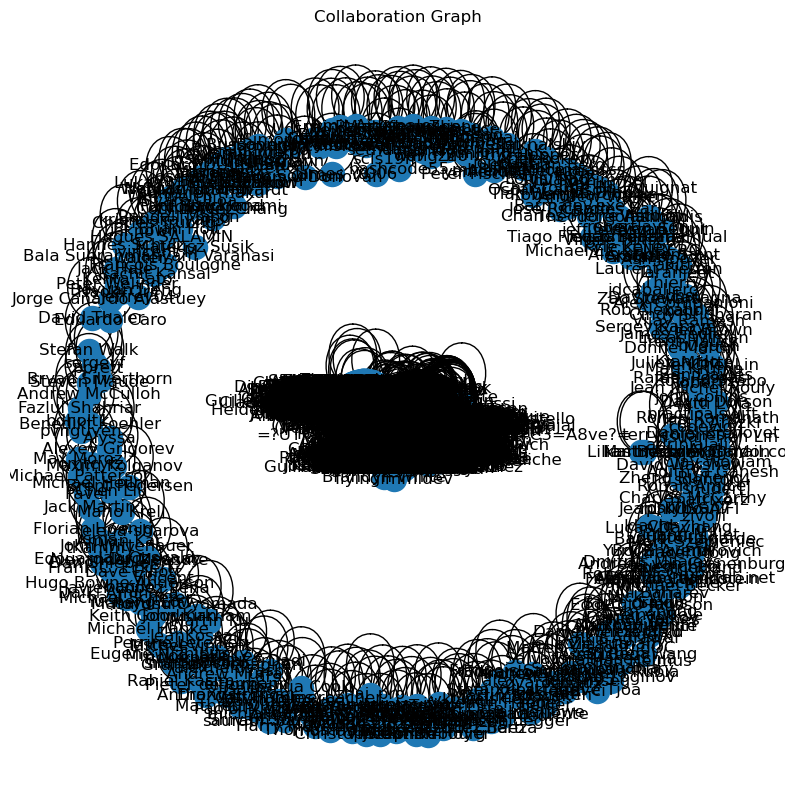

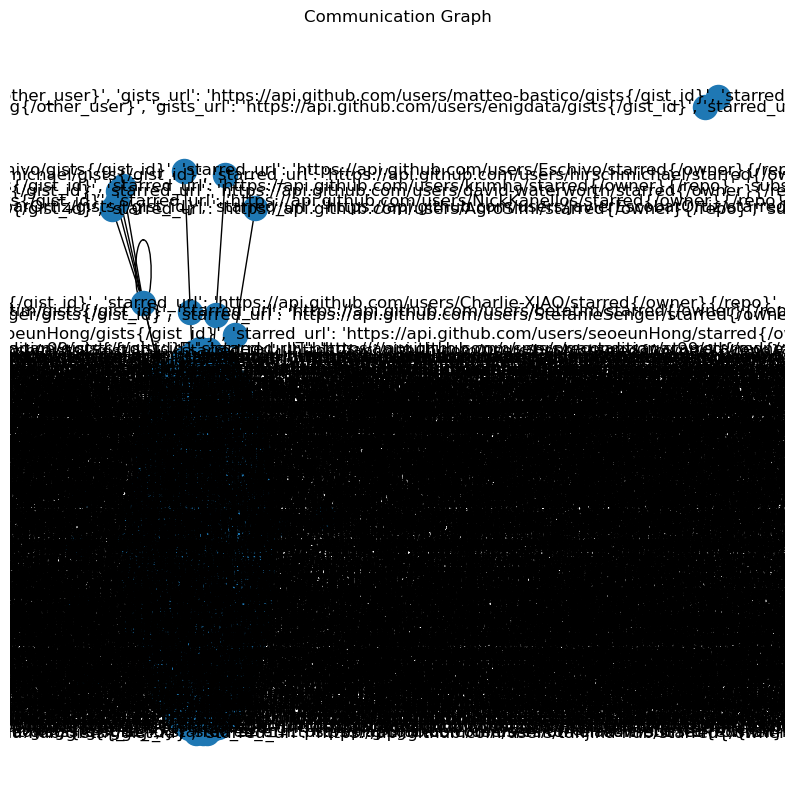

In [3]:


# Load Git log CSV data
git_log_df = pd.read_csv("git_log.csv")

# Load issues and pull requests CSV data
issues_prs_df = pd.read_csv("github_issues.csv")

# Step 1: Create Collaboration Graph
collaboration_graph = nx.Graph()

# Add nodes (contributors) based on Git log data
contributors = git_log_df["Author"].unique()
collaboration_graph.add_nodes_from(contributors)

# Add edges (collaboration) based on Git log data
for _, row in git_log_df.iterrows():
    collaboration_graph.add_edge(row["Author"], row["Committer"])

# Create a Matplotlib figure and axis for the collaboration graph
plt.figure(figsize=(10, 10))
ax1 = plt.subplot(111)

# Visualize the collaboration graph
pos = nx.spring_layout(collaboration_graph, seed=42)  # You can change the layout algorithm
nx.draw(collaboration_graph, pos=pos, with_labels=True, ax=ax1)
plt.title("Collaboration Graph")
plt.show()

# Step 2: Creating Communication Graph
communication_graph = nx.Graph()

# Add nodes (contributors) based on issues and pull requests data
contributors = issues_prs_df["user"].unique()
communication_graph.add_nodes_from(contributors)

# Create a Matplotlib figure and axis for the communication graph
plt.figure(figsize=(10, 10))
ax2 = plt.subplot(111)

# Add edges (communication) based on issues and pull requests data
for _, row in issues_prs_df.iterrows():
    communication_graph.add_edge(row["user"], row["assignee"])

# Visualizing the communication graph
pos = nx.spring_layout(communication_graph, seed=42)  # You can change the layout algorithm
nx.draw(communication_graph, pos=pos, with_labels=True, ax=ax2)
plt.title("Communication Graph")
plt.show()


C:\Users\khaou\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36213 (\N{CJK UNIFIED IDEOGRAPH-8D75}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\khaou\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20016 (\N{CJK UNIFIED IDEOGRAPH-4E30}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\khaou\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\khaou\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\khaou\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from current font.
  fig.canvas.print_figure(bytes_io, 

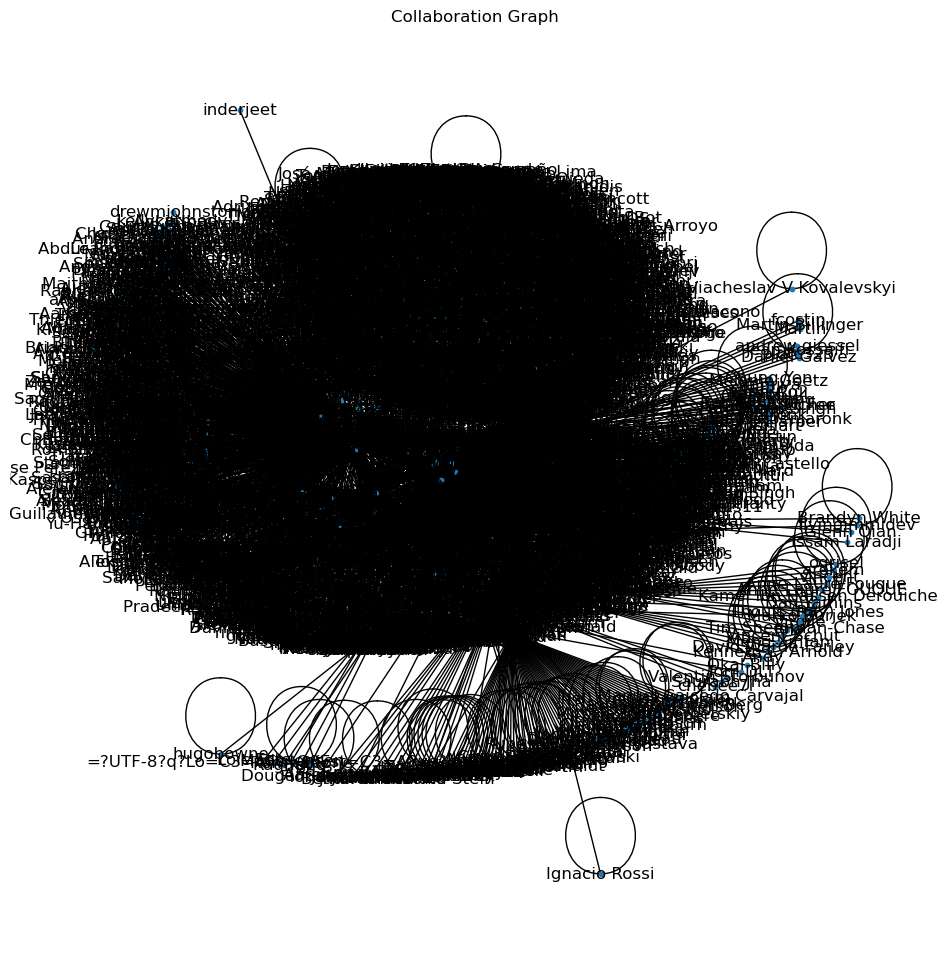

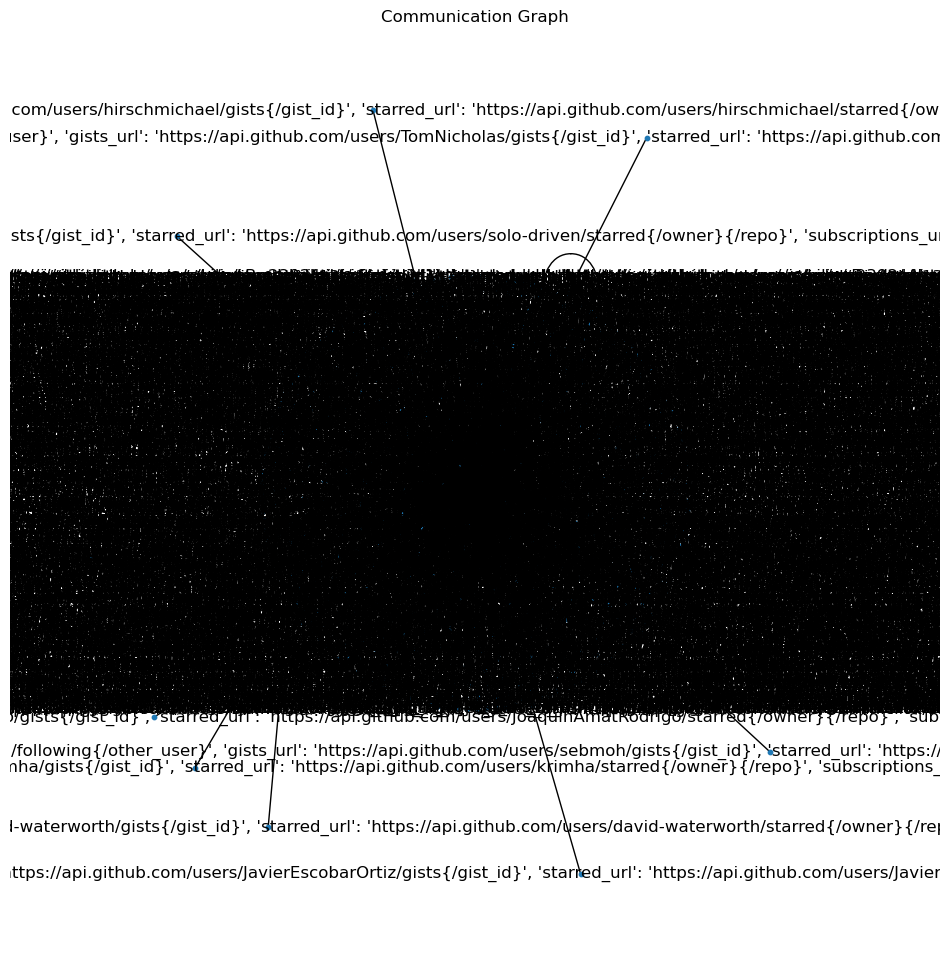

In [4]:

# Load Git log CSV data
git_log_df = pd.read_csv("git_log.csv")

# Load issues and pull requests CSV data
issues_prs_df = pd.read_csv("github_issues.csv")

# Step 1: Create Collaboration Graph
collaboration_graph = nx.Graph()

# Add nodes (contributors) based on Git log data
contributors = git_log_df["Author"].unique()
collaboration_graph.add_nodes_from(contributors)

# Add edges (collaboration) based on Git log data
for _, row in git_log_df.iterrows():
    collaboration_graph.add_edge(row["Author"], row["Committer"])

# Create a Matplotlib figure and axis for the collaboration graph
plt.figure(figsize=(12, 12))
ax1 = plt.subplot(111)

# Visualize the collaboration graph using the Kamada-Kawai layout
pos1 = nx.kamada_kawai_layout(collaboration_graph)
nx.draw(collaboration_graph, pos=pos1, with_labels=True, ax=ax1, node_size=10)
plt.title("Collaboration Graph")
plt.show()

# Step 2: Create Communication Graph
communication_graph = nx.Graph()

# Add nodes (contributors) based on issues and pull requests data
contributors = issues_prs_df["user"].unique()
communication_graph.add_nodes_from(contributors)

# Creating a Matplotlib figure and axis for the communication graph
plt.figure(figsize=(12, 12))
ax2 = plt.subplot(111)

# Add edges (communication) based on issues and pull requests data
for _, row in issues_prs_df.iterrows():
    communication_graph.add_edge(row["user"], row["assignee"])

# Visualizing the communication graph using the Kamada-Kawai layout
pos2 = nx.kamada_kawai_layout(communication_graph)
nx.draw(communication_graph, pos=pos2, with_labels=True, ax=ax2, node_size=10)
plt.title("Communication Graph")
plt.show()


# Analyze Text Data for Insights (NLP/ML/DL)

 We will use text data (commit messages, issue descriptions) for various analyses.
 A TEST of using TF-IDF and K-Means clustering:



# Combine text data from Git log and issues/prs

In [5]:
# Combine text data from Git log and issues/prs
text_data = git_log_df["Message"].tolist() + issues_prs_df["title"].tolist()

In [6]:
text_data

['DOC Fix a broken link in reference (#27299)\n\n',
 'MNT Avoid np.lib.arraysetops which is private in numpy 2 (#27297)\n\n',
 'MAINT Added automatic validation function for sklearn.neighbors.radius_neighbors_graph (#27245)\n\nCo-authored-by: Jérémie du Boisberranger <34657725+jeremiedbb@users.noreply.github.com>',
 'MAINT Param validation for dbscan (#27234)\n\n',
 'FIX make sure the decision function of weak learner is symmetric (#26521)\n\nCo-authored-by: Jérémie du Boisberranger <34657725+jeremiedbb@users.noreply.github.com>\r\nCo-authored-by: Olivier Grisel <olivier.grisel@ensta.org>',
 'DOC Add dropdown to Module 6.1 Pipelines and composite estimators (#27022)\n\n',
 'FIX Bisecting kmeans when data has 1 feature (#27243)\n\nCo-authored-by: Tim Head <betatim@gmail.com>',
 'DOC add reference DOI in PowerTransformer (#27247)\n\n',
 'EXA fix typo in HDBSCAN example (#27158)\n\nCo-authored-by: jeremie du boisberranger <jeremiedbb@yahoo.fr>',
 'MAINT Parameter validation for sklearn.ne

# Filter Bots identity from Text_data

In [7]:
# List of bot identity codes or keywords to filter out some small examples 
bot_identity_codes = [
    "github-actions",    # GitHub Actions bots
    "travis-ci",         # Travis CI bot
    "circleci",          # CircleCI bot
    "jenkins",           # Jenkins bot
    "codecov",           # Codecov bot
    "dependabot",        # Dependabot bot
    "coveralls",         # Coveralls bot
    "sonarcloud",        # SonarCloud bot
    "semantic-release",  # Semantic Release bot
    "renovate-bot",      # Renovate bot
    "botname1",          # Replace with specific bot names
    "botname2",          # we can add more bot names as needed
]


In [7]:
# Filter out bot identity codes from text_data
#text_data = [text for text in text_data if not any(bot_code in text.lower() for bot_code in bot_identity_codes)]

In [8]:
# Filter out bot identity codes from text_data
text_data = [text for text in text_data if isinstance(text, str) and not any(bot_code in text.lower() for bot_code in bot_identity_codes)]


In [9]:
text_data

['DOC Fix a broken link in reference (#27299)\n\n',
 'MNT Avoid np.lib.arraysetops which is private in numpy 2 (#27297)\n\n',
 'MAINT Added automatic validation function for sklearn.neighbors.radius_neighbors_graph (#27245)\n\nCo-authored-by: Jérémie du Boisberranger <34657725+jeremiedbb@users.noreply.github.com>',
 'MAINT Param validation for dbscan (#27234)\n\n',
 'FIX make sure the decision function of weak learner is symmetric (#26521)\n\nCo-authored-by: Jérémie du Boisberranger <34657725+jeremiedbb@users.noreply.github.com>\r\nCo-authored-by: Olivier Grisel <olivier.grisel@ensta.org>',
 'DOC Add dropdown to Module 6.1 Pipelines and composite estimators (#27022)\n\n',
 'FIX Bisecting kmeans when data has 1 feature (#27243)\n\nCo-authored-by: Tim Head <betatim@gmail.com>',
 'DOC add reference DOI in PowerTransformer (#27247)\n\n',
 'EXA fix typo in HDBSCAN example (#27158)\n\nCo-authored-by: jeremie du boisberranger <jeremiedbb@yahoo.fr>',
 'MAINT Parameter validation for sklearn.ne

# Tokenization and Data pre-processing

In [10]:
#nltk.download("stopwords")
#stop_words = set(stopwords.words("english"))
#translator = str.maketrans('', '', string.punctuation)
#text_data = [text.translate(translator).lower() for text in text_data]
#text_data = [text.split() for text in text_data]
#text_data = [[word for word in text if word not in stop_words] for text in text_data]

In [11]:
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


In [12]:
#Better pre-processing to give out more acurate results 

In [12]:
# Initializing NLTK resources
nltk.download("punkt")
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

# Tokenization, preprocessing, and stemming
preprocessed_data = []
for text_or_list in text_data:
    # Ensure text_or_list is a string
    if isinstance(text_or_list, str):
        # Tokenization
        tokens = word_tokenize(text_or_list)
        
        # Lowercasing, removing punctuation, stop words, and stemming
        filtered_tokens = [stemmer.stem(word.lower()) for word in tokens if word.lower() not in stop_words and word.lower() not in string.punctuation]
        
        # Join the filtered tokens back into a text string
        preprocessed_text = " ".join(filtered_tokens)
        
        preprocessed_data.append(preprocessed_text)
    elif isinstance(text_or_list, list):
        # If it's a list, convert it to a string (you may need to adjust this based on your data)
        preprocessed_data.append(" ".join(text_or_list))

# Now, preprocessed_data contains our preprocessed text data


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\khaou\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khaou\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
preprocessed_data

['doc fix broken link refer 27299',
 'mnt avoid np.lib.arraysetop privat numpi 2 27297',
 'maint ad automat valid function sklearn.neighbors.radius_neighbors_graph 27245 co-authored-bi jérémie du boisberrang 34657725+jeremiedbb users.noreply.github.com',
 'maint param valid dbscan 27234',
 'fix make sure decis function weak learner symmetr 26521 co-authored-bi jérémie du boisberrang 34657725+jeremiedbb users.noreply.github.com co-authored-bi olivi grisel olivier.grisel ensta.org',
 'doc add dropdown modul 6.1 pipelin composit estim 27022',
 'fix bisect kmean data 1 featur 27243 co-authored-bi tim head betatim gmail.com',
 'doc add refer doi powertransform 27247',
 'exa fix typo hdbscan exampl 27158 co-authored-bi jeremi du boisberrang jeremiedbb yahoo.fr',
 'maint paramet valid sklearn.neighbors.neighbors_graph 26568 co-authored-bi guillaum lemaitr g.lemaitre58 gmail.com co-authored-bi jérémie du boisberrang 34657725+jeremiedbb users.noreply.github.com',
 'mnt updat const usag ball kd 

# tf-IDF Vectorization and K-means

In [13]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(tfidf_matrix)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
tfidf_reduced = pca.fit_transform(tfidf_matrix.toarray())

C:\Users\khaou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Plot clusters

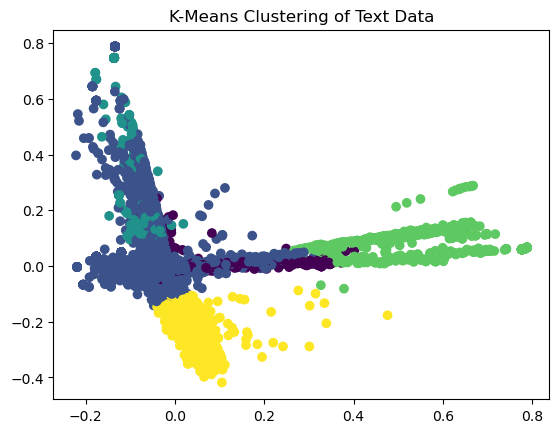

In [14]:

plt.scatter(tfidf_reduced[:, 0], tfidf_reduced[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("K-Means Clustering of Text Data")
plt.show()



# Further analyze and exploring the clusters to find interesting findings in the graphs

# Extract node attributes and convert them into a feature matrix

In [15]:
import networkx as nx
from sklearn.cluster import KMeans
import numpy as np

#  We have collaboration_graph defined with node attributes

# We  Extract node attributes and convert them into a feature matrix
node_features = []
for node in collaboration_graph.nodes(data=True):
    #  Extracting degree centrality as a feature
    degree_centrality = nx.degree_centrality(collaboration_graph)[node[0]]
    
    # We can Add other relevant attributes as features here
    # like extract betweenness centrality, closeness centrality, etc. for better findings
    
    # Creating a list of features for this node
    features = [degree_centrality]
    
    # Add the features to the feature matrix
    node_features.append(features)

# Convert the feature matrix to a numpy array
X = np.array(node_features)




In [16]:
node_features

[[0.0003363605785401951],
 [0.03969054826774302],
 [0.0003363605785401951],
 [0.0036999663639421462],
 [0.04170871173898419],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.03901782711066263],
 [0.0010090817356205853],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.015472586612848975],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.0003363605785401951],
 [0.002018163471241

In [17]:
X

array([[3.36360579e-04],
       [3.96905483e-02],
       [3.36360579e-04],
       ...,
       [4.24150690e-01],
       [3.36360579e-04],
       [3.36360579e-04]])

# Perform K-Means clustering on the feature matrix

In [18]:

kmeans_collaboration = KMeans(n_clusters=5)
collaboration_labels = kmeans_collaboration.fit_predict(X)


C:\Users\khaou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
collaboration_labels

array([0, 2, 0, ..., 1, 0, 0])

# Perform K-Means clustering on communication_graph

In [20]:

# Extract node attributes and convert them into a feature matrix
node_features_communication = []
for node in communication_graph.nodes(data=True):
    # Example: Extracting degree centrality as a feature
    degree_centrality = nx.degree_centrality(communication_graph)[node[0]]
    
    # Add other relevant attributes as features here
    # For example, you can extract betweenness centrality, closeness centrality, etc.
    
    # Create a list of features for this node
    features = [degree_centrality]
    
    # Add the features to the feature matrix
    node_features_communication.append(features)

# Convert the feature matrix to a numpy array
X_communication = np.array(node_features_communication)

# Perform K-Means clustering on the feature matrix for communication_graph
kmeans_communication = KMeans(n_clusters=5)
communication_labels = kmeans_communication.fit_predict(X_communication)



C:\Users\khaou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\khaou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [21]:
features

[0.0018018018018018018]

In [22]:
node_features_communication

[[0.0018018018018018018],
 [0.0018018018018018018],
 [0.0036036036036036037],
 [0.0018018018018018018],
 [0.0036036036036036037],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.016216216216216217],
 [0.0036036036036036037],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.014414414414414415],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.010810810810810811],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0018018018018018018],
 [0.0036036036036036037],
 [0.0036036036036036037],
 [0.00360360360

In [23]:
communication_labels

array([0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 2, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:

# Analyze and explore collaboration clusters
for cluster_id in range(5):  # Assuming 5 clusters
    cluster_nodes = [node for node, label in zip(collaboration_graph.nodes, collaboration_labels) if label == cluster_id]
    cluster_subgraph = collaboration_graph.subgraph(cluster_nodes)
    
    # Analyze the cluster subgraph
    print(f"Collaboration Cluster {cluster_id} - Number of Nodes: {len(cluster_subgraph.nodes)}")
    
    # Example: Calculate and print degree centrality for each node in the cluster
    degree_centrality = nx.degree_centrality(cluster_subgraph)
    for node, centrality in degree_centrality.items():
        print(f"Node {node}: Degree Centrality {centrality}")
    
    # Clear the current figure
    plt.clf()
    
    # Visualizing the cluster subgraph
    pos = nx.spring_layout(cluster_subgraph, seed=42)  # You can change the layout algorithm
    nx.draw(cluster_subgraph, pos=pos, with_labels=True)
    plt.title(f"Collaboration Cluster {cluster_id}")
    plt.show()

Collaboration Cluster 0 - Number of Nodes: 2961
Node Xiao Yuan: Degree Centrality 0.0
Node Sayed Qaiser Ali: Degree Centrality 0.0
Node Jérémie du Boisberranger: Degree Centrality 0.002027027027027027
Node Raphael: Degree Centrality 0.0
Node Xuefeng Xu: Degree Centrality 0.0
Node Vladimir Fokow: Degree Centrality 0.0
Node Stefanie Senger: Degree Centrality 0.0
Node Meekail Zain: Degree Centrality 0.0
Node Adam Li: Degree Centrality 0.0
Node Camille Troillard: Degree Centrality 0.0
Node Shreesha Kumar Bhat: Degree Centrality 0.0
Node Bharat Raghunathan: Degree Centrality 0.0
Node Naman Dhingra: Degree Centrality 0.0
Node Vivek Reddy P: Degree Centrality 0.0
Node Puneeth K: Degree Centrality 0.0
Node Rahil Parikh: Degree Centrality 0.0
Node IsaacTrost: Degree Centrality 0.0
Node Kushan Sharma: Degree Centrality 0.0
Node Julien Jerphanion: Degree Centrality 0.0
Node Omar Salman: Degree Centrality 0.0
Node Mohit Joshi: Degree Centrality 0.0
Node Tialo: Degree Centrality 0.0
Node David Broc

TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

In [39]:
# Analyze and explore collaboration clusters

# Analyze and explore collaboration clusters
for cluster_id in range(5):  # Assuming 5 clusters
    cluster_nodes = [node for node, label in zip(collaboration_graph.nodes, collaboration_labels) if label == cluster_id]
    cluster_subgraph = collaboration_graph.subgraph(cluster_nodes)

    # Example: Calculate and print degree centrality for each node in the cluster
    degree_centrality = nx.degree_centrality(cluster_subgraph)
    for node, centrality in degree_centrality.items():
        print(f"Node {node}: Degree Centrality {centrality}")

    # Calculate and print other centrality measures
    betweenness_centrality = nx.betweenness_centrality(cluster_subgraph)
    for node, centrality in betweenness_centrality.items():
        print(f"Node {node}: Betweenness Centrality {centrality}")
    
    closeness_centrality = nx.closeness_centrality(cluster_subgraph)
    for node, centrality in closeness_centrality.items():
        print(f"Node {node}: Closeness Centrality {centrality}")

    # we can add more centrality measures as needed

    # Visualize the subgraph in more detail
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(cluster_subgraph, seed=42)  # You can change the layout algorithm
    nx.draw(cluster_subgraph, pos=pos, with_labels=True)
    plt.title(f"Collaboration Cluster {cluster_id}")
    plt.show()


    # For example,we use hypothesis tests to compare centrality measures across clusters



Node Xiao Yuan: Degree Centrality 0.0
Node Sayed Qaiser Ali: Degree Centrality 0.0
Node Jérémie du Boisberranger: Degree Centrality 0.002027027027027027
Node Raphael: Degree Centrality 0.0
Node Xuefeng Xu: Degree Centrality 0.0
Node Vladimir Fokow: Degree Centrality 0.0
Node Stefanie Senger: Degree Centrality 0.0
Node Meekail Zain: Degree Centrality 0.0
Node Adam Li: Degree Centrality 0.0
Node Camille Troillard: Degree Centrality 0.0
Node Shreesha Kumar Bhat: Degree Centrality 0.0
Node Bharat Raghunathan: Degree Centrality 0.0
Node Naman Dhingra: Degree Centrality 0.0
Node Vivek Reddy P: Degree Centrality 0.0
Node Puneeth K: Degree Centrality 0.0
Node Rahil Parikh: Degree Centrality 0.0
Node IsaacTrost: Degree Centrality 0.0
Node Kushan Sharma: Degree Centrality 0.0
Node Julien Jerphanion: Degree Centrality 0.0
Node Omar Salman: Degree Centrality 0.0
Node Mohit Joshi: Degree Centrality 0.0
Node Tialo: Degree Centrality 0.0
Node David Brochart: Degree Centrality 0.0
Node DaminK: Degree 

TypeError: '_AxesStack' object is not callable

<Figure size 1000x1000 with 0 Axes>

# Perform statistical tests  for Collaboration Graph 

In [46]:
from scipy import stats

# Analyze and explore collaboration clusters
for cluster_id in range(5):  # Assuming 5 clusters
    cluster_nodes = [node for node, label in zip(collaboration_graph.nodes, collaboration_labels) if label == cluster_id]
    cluster_subgraph = collaboration_graph.subgraph(cluster_nodes)

    # Calculate and print degree centrality for each node in the cluster
    degree_centrality = nx.degree_centrality(cluster_subgraph)
    for node, centrality in degree_centrality.items():
        print(f"Node {node}: Degree Centrality {centrality}")

    # Calculate and print other centrality measures
    betweenness_centrality = nx.betweenness_centrality(cluster_subgraph)
    for node, centrality in betweenness_centrality.items():
        print(f"Node {node}: Betweenness Centrality {centrality}")
    
    closeness_centrality = nx.closeness_centrality(cluster_subgraph)
    for node, centrality in closeness_centrality.items():
        print(f"Node {node}: Closeness Centrality {centrality}")

    # We can add more centrality measures as needed

    # Visualize the subgraph in more detail
    #plt.figure(figsize=(10, 10))
    #pos = nx.spring_layout(cluster_subgraph, seed=42)  # You can change the layout algorithm
    #nx.draw(cluster_subgraph, pos=pos, with_labels=True)
    #plt.title(f"Collaboration Cluster {cluster_id}")
    #plt.show()

    # Perform statistical tests if needed
    # For example, we can use hypothesis tests to compare centrality measures across clusters

    # Example: Perform a t-test on degree centrality between Cluster 0 and Cluster 1
    cluster_0_degree_centrality = [centrality for node, centrality in degree_centrality.items() ]
    cluster_1_degree_centrality = [centrality for node, centrality in degree_centrality.items() ]

    t_stat, p_value = stats.ttest_ind(cluster_0_degree_centrality, cluster_1_degree_centrality)
    print(f"T-Test between Cluster 0 and Cluster 1 - T-statistic: {t_stat}, P-value: {p_value}")

    # we can perform similar tests for other centrality measures or between other clusters
    # by Choosing the appropriate statistical test based on your research questions and goals

    # we can also use descriptive statistics to summarize cluster characteristics
    # Calculate mean, median, standard deviation, etc., for centrality measures

    mean_degree_centrality = np.mean(list(degree_centrality.values()))
    median_degree_centrality = np.median(list(degree_centrality.values()))
    std_degree_centrality = np.std(list(degree_centrality.values()))

    print(f"Mean Degree Centrality: {mean_degree_centrality}")
    print(f"Median Degree Centrality: {median_degree_centrality}")
    print(f"Standard Deviation of Degree Centrality: {std_degree_centrality}")

    


Node Xiao Yuan: Degree Centrality 0.0
Node Sayed Qaiser Ali: Degree Centrality 0.0
Node Jérémie du Boisberranger: Degree Centrality 0.002027027027027027
Node Raphael: Degree Centrality 0.0
Node Xuefeng Xu: Degree Centrality 0.0
Node Vladimir Fokow: Degree Centrality 0.0
Node Stefanie Senger: Degree Centrality 0.0
Node Meekail Zain: Degree Centrality 0.0
Node Adam Li: Degree Centrality 0.0
Node Camille Troillard: Degree Centrality 0.0
Node Shreesha Kumar Bhat: Degree Centrality 0.0
Node Bharat Raghunathan: Degree Centrality 0.0
Node Naman Dhingra: Degree Centrality 0.0
Node Vivek Reddy P: Degree Centrality 0.0
Node Puneeth K: Degree Centrality 0.0
Node Rahil Parikh: Degree Centrality 0.0
Node IsaacTrost: Degree Centrality 0.0
Node Kushan Sharma: Degree Centrality 0.0
Node Julien Jerphanion: Degree Centrality 0.0
Node Omar Salman: Degree Centrality 0.0
Node Mohit Joshi: Degree Centrality 0.0
Node Tialo: Degree Centrality 0.0
Node David Brochart: Degree Centrality 0.0
Node DaminK: Degree 

C:\Users\khaou\AppData\Local\Temp\ipykernel_25196\3404313980.py:38: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(cluster_0_degree_centrality, cluster_1_degree_centrality)
C:\Users\khaou\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\khaou\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


# Analyze and explore communication clusters

In [47]:
# Analyze and explore communication clusters
for cluster_id in range(5):  # Assuming 5 clusters
    cluster_nodes = [node for node, label in zip(communication_graph.nodes, communication_labels) if label == cluster_id]
    cluster_subgraph = communication_graph.subgraph(cluster_nodes)
    
    # Analyze the cluster subgraph
    print(f"Communication Cluster {cluster_id} - Number of Nodes: {len(cluster_subgraph.nodes)}")
    
    # We Calculate and print degree centrality for each node in the cluster
    degree_centrality = nx.degree_centrality(cluster_subgraph)
    for node, centrality in degree_centrality.items():
        print(f"Node {node}: Degree Centrality {centrality}")
    
    #Then Visualize the cluster subgraph
    pos = nx.spring_layout(cluster_subgraph, seed=42)  
    nx.draw(cluster_subgraph, pos=pos, with_labels=True)
    plt.title(f"Communication Cluster {cluster_id}")
    plt.show()

Communication Cluster 0 - Number of Nodes: 532
Node {'login': 'gjsun255', 'id': 68744203, 'node_id': 'MDQ6VXNlcjY4NzQ0MjAz', 'avatar_url': 'https://avatars.githubusercontent.com/u/68744203?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/gjsun255', 'html_url': 'https://github.com/gjsun255', 'followers_url': 'https://api.github.com/users/gjsun255/followers', 'following_url': 'https://api.github.com/users/gjsun255/following{/other_user}', 'gists_url': 'https://api.github.com/users/gjsun255/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/gjsun255/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/gjsun255/subscriptions', 'organizations_url': 'https://api.github.com/users/gjsun255/orgs', 'repos_url': 'https://api.github.com/users/gjsun255/repos', 'events_url': 'https://api.github.com/users/gjsun255/events{/privacy}', 'received_events_url': 'https://api.github.com/users/gjsun255/received_events', 'type': 'User', 'site_admin': False}: Degr

TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

# Perform statistical tests  for Communication Graph 

Node {'login': 'gjsun255', 'id': 68744203, 'node_id': 'MDQ6VXNlcjY4NzQ0MjAz', 'avatar_url': 'https://avatars.githubusercontent.com/u/68744203?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/gjsun255', 'html_url': 'https://github.com/gjsun255', 'followers_url': 'https://api.github.com/users/gjsun255/followers', 'following_url': 'https://api.github.com/users/gjsun255/following{/other_user}', 'gists_url': 'https://api.github.com/users/gjsun255/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/gjsun255/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/gjsun255/subscriptions', 'organizations_url': 'https://api.github.com/users/gjsun255/orgs', 'repos_url': 'https://api.github.com/users/gjsun255/repos', 'events_url': 'https://api.github.com/users/gjsun255/events{/privacy}', 'received_events_url': 'https://api.github.com/users/gjsun255/received_events', 'type': 'User', 'site_admin': False}: Degree Centrality 0.0
Node {'login': 'nickubels', '

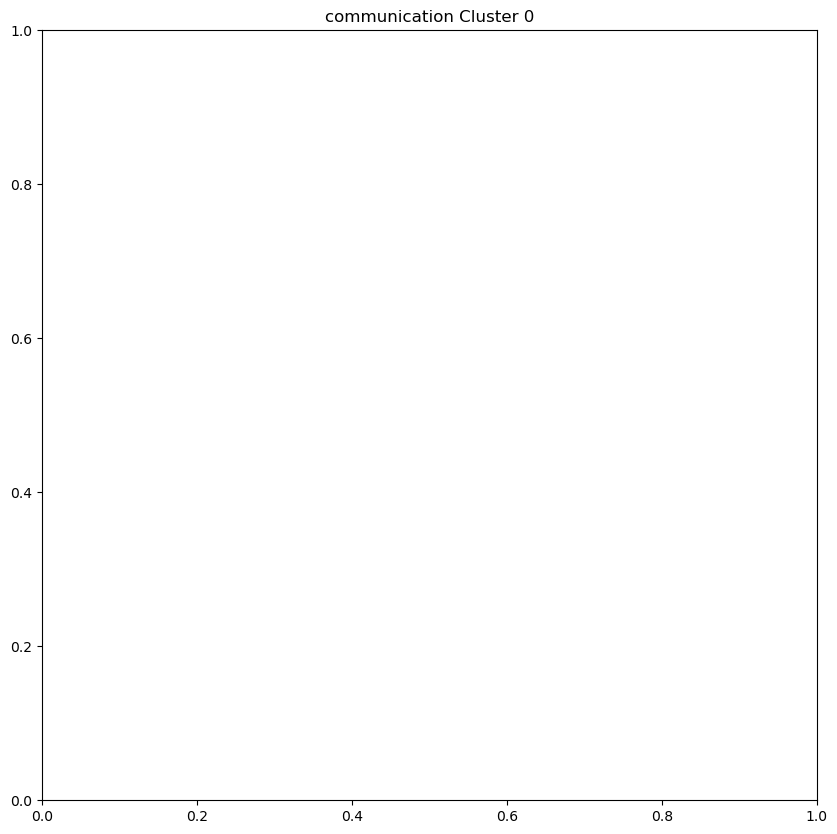

T-Test between Cluster 0 and Cluster 1 - T-statistic: nan, P-value: nan
Mean Degree Centrality: 7.079846508927686e-06
Median Degree Centrality: 0.0
Standard Deviation of Degree Centrality: 0.0001152515511667566
Node nan: Degree Centrality 1
Node nan: Betweenness Centrality 0.0
Node nan: Closeness Centrality 0.0


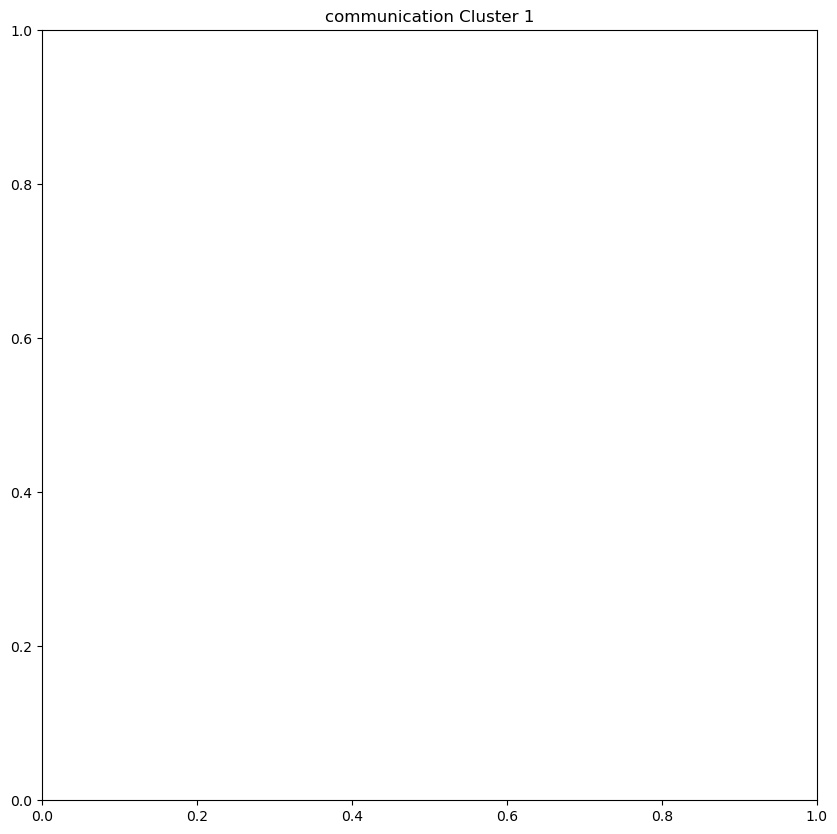

T-Test between Cluster 0 and Cluster 1 - T-statistic: nan, P-value: nan
Mean Degree Centrality: 1.0
Median Degree Centrality: 1.0
Standard Deviation of Degree Centrality: 0.0
Node {'login': 'glemaitre', 'id': 7454015, 'node_id': 'MDQ6VXNlcjc0NTQwMTU=', 'avatar_url': 'https://avatars.githubusercontent.com/u/7454015?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/glemaitre', 'html_url': 'https://github.com/glemaitre', 'followers_url': 'https://api.github.com/users/glemaitre/followers', 'following_url': 'https://api.github.com/users/glemaitre/following{/other_user}', 'gists_url': 'https://api.github.com/users/glemaitre/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/glemaitre/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/glemaitre/subscriptions', 'organizations_url': 'https://api.github.com/users/glemaitre/orgs', 'repos_url': 'https://api.github.com/users/glemaitre/repos', 'events_url': 'https://api.github.com/users/glemaitre/even

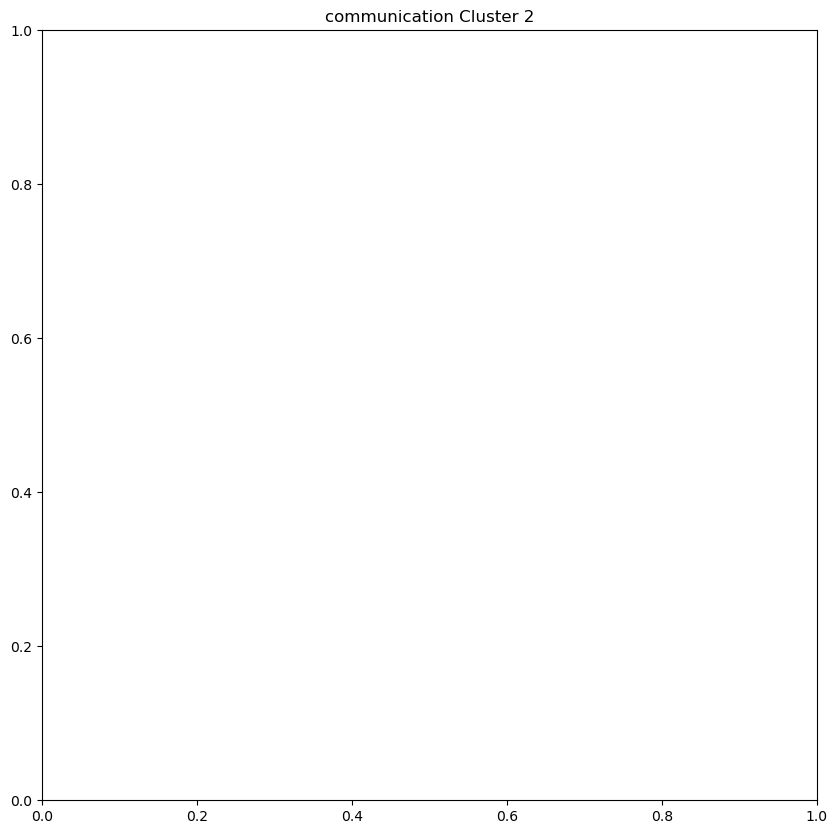

T-Test between Cluster 0 and Cluster 1 - T-statistic: nan, P-value: nan
Mean Degree Centrality: 2.0
Median Degree Centrality: 2.0
Standard Deviation of Degree Centrality: 0.0
Node {'login': 'betatim', 'id': 1448859, 'node_id': 'MDQ6VXNlcjE0NDg4NTk=', 'avatar_url': 'https://avatars.githubusercontent.com/u/1448859?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/betatim', 'html_url': 'https://github.com/betatim', 'followers_url': 'https://api.github.com/users/betatim/followers', 'following_url': 'https://api.github.com/users/betatim/following{/other_user}', 'gists_url': 'https://api.github.com/users/betatim/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/betatim/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/betatim/subscriptions', 'organizations_url': 'https://api.github.com/users/betatim/orgs', 'repos_url': 'https://api.github.com/users/betatim/repos', 'events_url': 'https://api.github.com/users/betatim/events{/privacy}', 'receiv

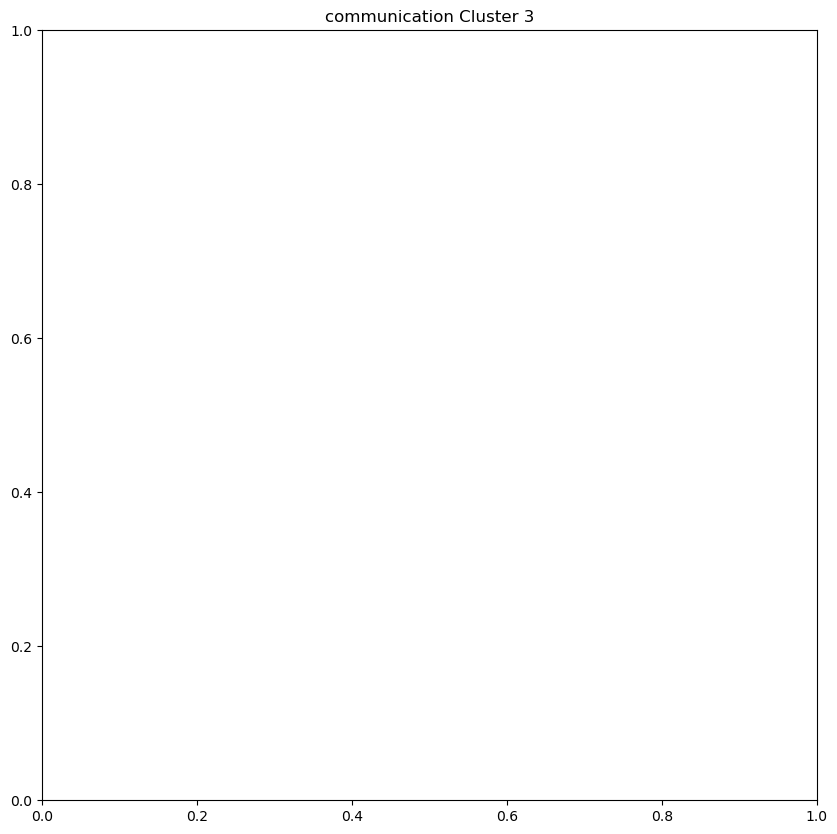

T-Test between Cluster 0 and Cluster 1 - T-statistic: nan, P-value: nan
Mean Degree Centrality: 0.015789473684210527
Median Degree Centrality: 0.0
Standard Deviation of Degree Centrality: 0.03370065388122552
Node {'login': 'thomasjpfan', 'id': 5402633, 'node_id': 'MDQ6VXNlcjU0MDI2MzM=', 'avatar_url': 'https://avatars.githubusercontent.com/u/5402633?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/thomasjpfan', 'html_url': 'https://github.com/thomasjpfan', 'followers_url': 'https://api.github.com/users/thomasjpfan/followers', 'following_url': 'https://api.github.com/users/thomasjpfan/following{/other_user}', 'gists_url': 'https://api.github.com/users/thomasjpfan/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/thomasjpfan/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/thomasjpfan/subscriptions', 'organizations_url': 'https://api.github.com/users/thomasjpfan/orgs', 'repos_url': 'https://api.github.com/users/thomasjpfan/repos', 'even

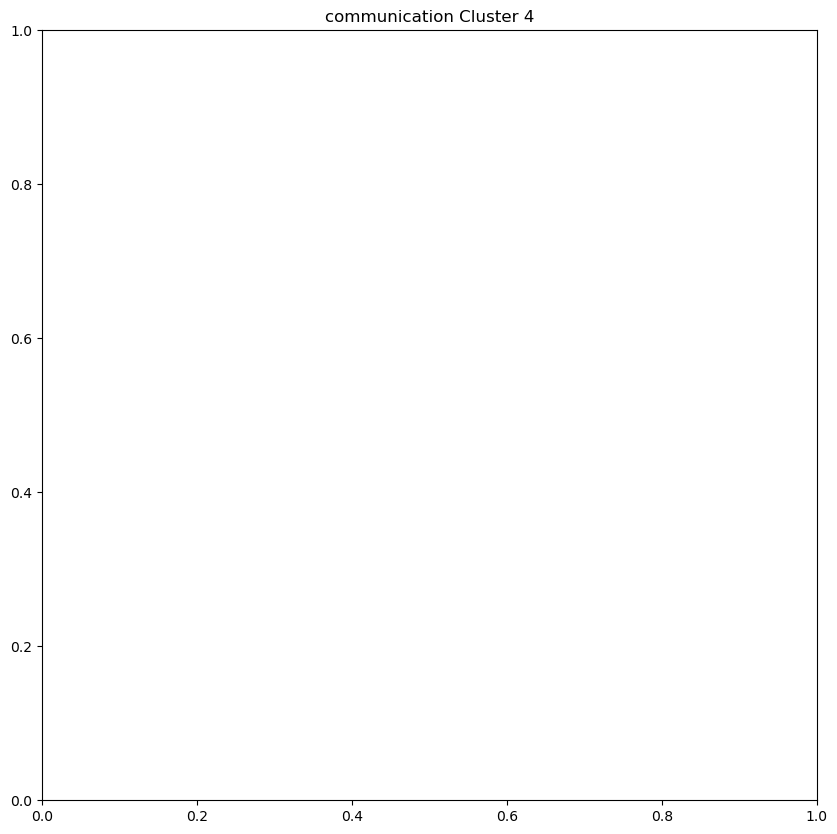

T-Test between Cluster 0 and Cluster 1 - T-statistic: nan, P-value: nan
Mean Degree Centrality: 1.0
Median Degree Centrality: 1.0
Standard Deviation of Degree Centrality: 0.0


In [49]:
from scipy import stats

# Analyze and explore collaboration clusters
for cluster_id in range(5):  # Assuming 5 clusters
    cluster_nodes = [node for node, label in zip(communication_graph.nodes, communication_labels) if label == cluster_id]
    cluster_subgraph = communication_graph.subgraph(cluster_nodes)

    # Calculate and print degree centrality for each node in the cluster
    degree_centrality = nx.degree_centrality(cluster_subgraph)
    for node, centrality in degree_centrality.items():
        print(f"Node {node}: Degree Centrality {centrality}")

    # Calculate and print other centrality measures
    betweenness_centrality = nx.betweenness_centrality(cluster_subgraph)
    for node, centrality in betweenness_centrality.items():
        print(f"Node {node}: Betweenness Centrality {centrality}")
    
    closeness_centrality = nx.closeness_centrality(cluster_subgraph)
    for node, centrality in closeness_centrality.items():
        print(f"Node {node}: Closeness Centrality {centrality}")

    # We can add more centrality measures as needed

    # Visualize the subgraph in more detail
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(cluster_subgraph, seed=42)  # You can change the layout algorithm
    #nx.draw(cluster_subgraph, pos=pos, with_labels=True)
    plt.title(f"communication Cluster {cluster_id}")
    plt.show()

    # Perform statistical tests if needed
    # For example, we can use hypothesis tests to compare centrality measures across clusters

    # Example: Perform a t-test on degree centrality between Cluster 0 and Cluster 1
    cluster_0_degree_centrality = [centrality for node, centrality in degree_centrality.items() if cluster_id == 0]
    cluster_1_degree_centrality = [centrality for node, centrality in degree_centrality.items() if cluster_id == 1]

    t_stat, p_value = stats.ttest_ind(cluster_0_degree_centrality, cluster_1_degree_centrality)
    print(f"T-Test between Cluster 0 and Cluster 1 - T-statistic: {t_stat}, P-value: {p_value}")

    # we can perform similar tests for other centrality measures or between other clusters
    # by Choosing the appropriate statistical test based on your research questions and goals

    # we can also use descriptive statistics to summarize cluster characteristics
    # Calculate mean, median, standard deviation, etc., for centrality measures

    mean_degree_centrality = np.mean(list(degree_centrality.values()))
    median_degree_centrality = np.median(list(degree_centrality.values()))
    std_degree_centrality = np.std(list(degree_centrality.values()))

    print(f"Mean Degree Centrality: {mean_degree_centrality}")
    print(f"Median Degree Centrality: {median_degree_centrality}")
    print(f"Standard Deviation of Degree Centrality: {std_degree_centrality}")

    


In [25]:
from sklearn.cluster import KMeans
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [26]:
# Analyze and explore collaboration clusters
for cluster_id in range(5):  # Assuming 5 clusters
    cluster_nodes = [node for node, label in zip(collaboration_graph.nodes, collaboration_labels) if label == cluster_id]
    cluster_subgraph = collaboration_graph.subgraph(cluster_nodes)
    
    # Analyze the cluster subgraph
    print(f"Collaboration Cluster {cluster_id} - Number of Nodes: {len(cluster_subgraph.nodes)}")
    
    # Example: Calculate and print degree centrality for each node in the cluster
    degree_centrality = nx.degree_centrality(cluster_subgraph)
    for node, centrality in degree_centrality.items():
        print(f"Node {node}: Degree Centrality {centrality}")
    
    # Clear the current figure
    plt.clf()
    
    # Visualizing the cluster subgraph
    pos = nx.spring_layout(cluster_subgraph, seed=42)  # You can change the layout algorithm
    nx.draw(cluster_subgraph, pos=pos, with_labels=True)
    plt.title(f"Collaboration Cluster {cluster_id}")
    
    # Further analyze the cluster using the ensemble model
    cluster_features = extract_features(cluster_subgraph)  # Extract features for the cluster
    cluster_predictions = ensemble.predict(cluster_features)  # Predict labels for the cluster
    
    # You can then analyze cluster_predictions, visualize, or interpret the results as needed

    plt.show()


Collaboration Cluster 0 - Number of Nodes: 2961
Node Xiao Yuan: Degree Centrality 0.0
Node Sayed Qaiser Ali: Degree Centrality 0.0
Node Jérémie du Boisberranger: Degree Centrality 0.002027027027027027
Node Raphael: Degree Centrality 0.0
Node Xuefeng Xu: Degree Centrality 0.0
Node Vladimir Fokow: Degree Centrality 0.0
Node Stefanie Senger: Degree Centrality 0.0
Node Meekail Zain: Degree Centrality 0.0
Node Adam Li: Degree Centrality 0.0
Node Camille Troillard: Degree Centrality 0.0
Node Shreesha Kumar Bhat: Degree Centrality 0.0
Node Bharat Raghunathan: Degree Centrality 0.0
Node Naman Dhingra: Degree Centrality 0.0
Node Vivek Reddy P: Degree Centrality 0.0
Node Puneeth K: Degree Centrality 0.0
Node Rahil Parikh: Degree Centrality 0.0
Node IsaacTrost: Degree Centrality 0.0
Node Kushan Sharma: Degree Centrality 0.0
Node Julien Jerphanion: Degree Centrality 0.0
Node Omar Salman: Degree Centrality 0.0
Node Mohit Joshi: Degree Centrality 0.0
Node Tialo: Degree Centrality 0.0
Node David Broc

TypeError: '_AxesStack' object is not callable

<Figure size 640x480 with 0 Axes>

In [27]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
import networkx as nx
import pandas as pd


# cluster analysis on the collaboration and communication graphs using a voting system with multiple machine learning models

In [28]:
from sklearn.cluster import KMeans
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, matthews_corrcoef
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [29]:

# Load first collaboration_graph and communication_graph

# Extract degree centrality as a feature for each node in the collaboration graph
collaboration_degree_centrality = nx.degree_centrality(collaboration_graph)
collaboration_features = np.array([collaboration_degree_centrality[node] for node in collaboration_graph.nodes()]).reshape(-1, 1)

# Extract degree centrality as a feature for each node in the communication graph
communication_degree_centrality = nx.degree_centrality(communication_graph)
communication_features = np.array([communication_degree_centrality[node] for node in communication_graph.nodes()]).reshape(-1, 1)

# Perform K-Means clustering on collaboration_graph based on degree centrality
kmeans_collaboration = KMeans(n_clusters=5)
collaboration_labels = kmeans_collaboration.fit_predict(collaboration_features)

# Perform K-Means clustering on communication_graph based on degree centrality
kmeans_communication = KMeans(n_clusters=5)
communication_labels = kmeans_communication.fit_predict(communication_features)


C:\Users\khaou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\khaou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\khaou\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [30]:
from sklearn.model_selection import train_test_split


In [31]:
collaboration_labels

array([0, 3, 0, ..., 1, 0, 0])

In [32]:
communication_labels

array([0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 2, 0, 0, 0, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,

# Define the ensemble of classifiers

In [33]:

ensemble_models = [
    ('decision_tree', DecisionTreeClassifier(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    # Add more classifiers as needed
]



# Creating a DataFrame to store results

In [34]:

results_df = pd.DataFrame(columns=['Cluster', 'Classifier', 'Accuracy', 'MCC'])

C:\Users\khaou\AppData\Local\Temp\ipykernel_25196\1661804600.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Cluster': cluster_id, 'Classifier': 'Ensemble', 'Accuracy': accuracy, 'MCC': mcc}, ignore_index=True)
C:\Users\khaou\AppData\Local\Temp\ipykernel_25196\1661804600.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Cluster': cluster_id, 'Classifier': 'Ensemble', 'Accuracy': accuracy, 'MCC': mcc}, ignore_index=True)
C:\Users\khaou\AppData\Local\Temp\ipykernel_25196\1661804600.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Cluster': cluster_id, 'Classifier': 'Ensemble', 'Accuracy': accuracy, 'MCC': mcc}, ignor

  Cluster Classifier  Accuracy  MCC
0       0   Ensemble       1.0  1.0
1       1   Ensemble       1.0  1.0
2       2   Ensemble       1.0  1.0
3       3   Ensemble       1.0  1.0
4       4   Ensemble       1.0  1.0


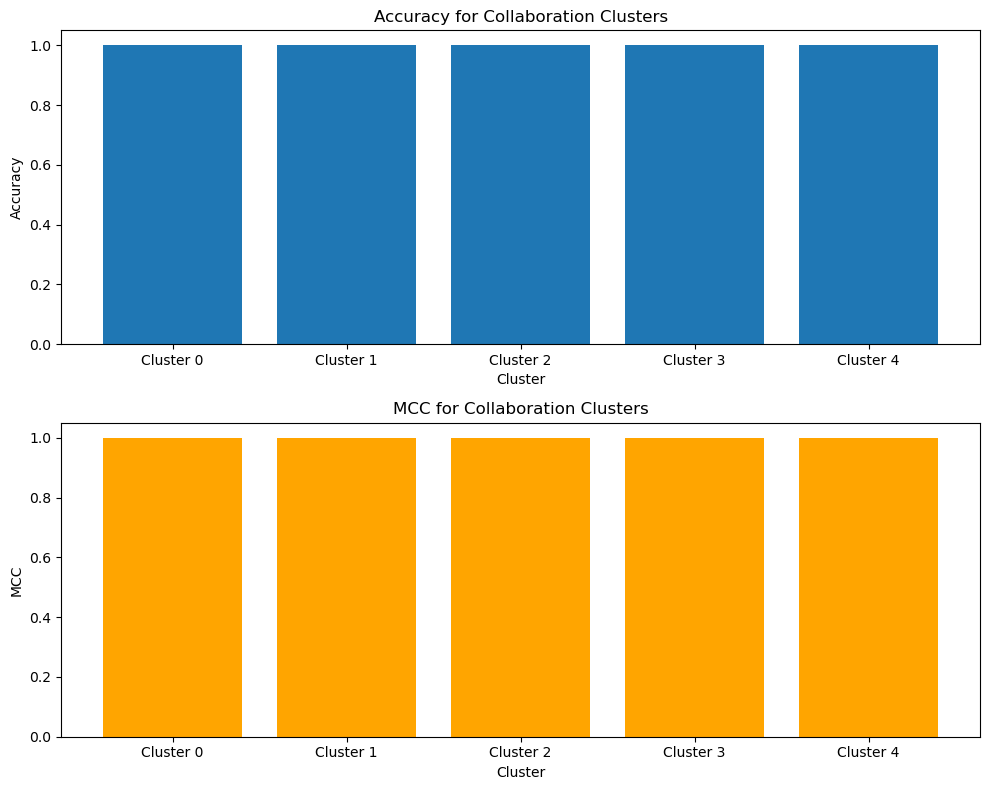

In [35]:
# Analyze and explore collaboration clusters
for cluster_id in range(5):  # Assuming 5 clusters
    cluster_nodes = [node for node, label in zip(collaboration_graph.nodes, collaboration_labels) if label == cluster_id]
    cluster_subgraph = collaboration_graph.subgraph(cluster_nodes)

    # Extract features for nodes in the cluster (similar to what you did before)
    # features = ...

    # Split your data into training and testing sets (X_train, X_test, y_train, y_test)
    # Ensure that you have X_train, X_test, y_train, and y_test defined here.
    # Extract features for nodes in the cluster (similar to what you did before)

    
# Split your data into training and testing sets (X_train, X_test, y_train, y_test)
# Assuming you have a target variable 'y' for each graph
    X_collaboration_train, X_collaboration_test, y_collaboration_train, y_collaboration_test = train_test_split(collaboration_features, collaboration_labels, test_size=0.2, random_state=42)

   # X_communication_train, X_communication_test, y_communication_train, y_communication_test = train_test_split(communication_features, communication_labels, test_size=0.2, random_state=42)

    # Initialize a voting classifier with your ensemble of models
    ensemble = VotingClassifier(estimators=ensemble_models, voting='hard')

    # Train the ensemble model on the training data
    ensemble.fit(X_collaboration_train, y_collaboration_train)

    # Make predictions on the test set
    y_pred = ensemble.predict(X_collaboration_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_collaboration_test, y_pred)
    mcc = matthews_corrcoef(y_collaboration_test, y_pred)

    # Store the results in the DataFrame
    results_df = results_df.append({'Cluster': cluster_id, 'Classifier': 'Ensemble', 'Accuracy': accuracy, 'MCC': mcc}, ignore_index=True)


# Print or analyze the results as needed
print(results_df)

# Create subplots for accuracy and MCC
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot accuracy values
axes[0].bar(range(5), accuracy, tick_label=[f'Cluster {i}' for i in range(5)])
axes[0].set_title('Accuracy for Collaboration Clusters')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Accuracy')

# Plot MCC values
axes[1].bar(range(5), mcc, tick_label=[f'Cluster {i}' for i in range(5)], color='orange')
axes[1].set_title('MCC for Collaboration Clusters')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('MCC')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


TypeError: '_AxesStack' object is not callable

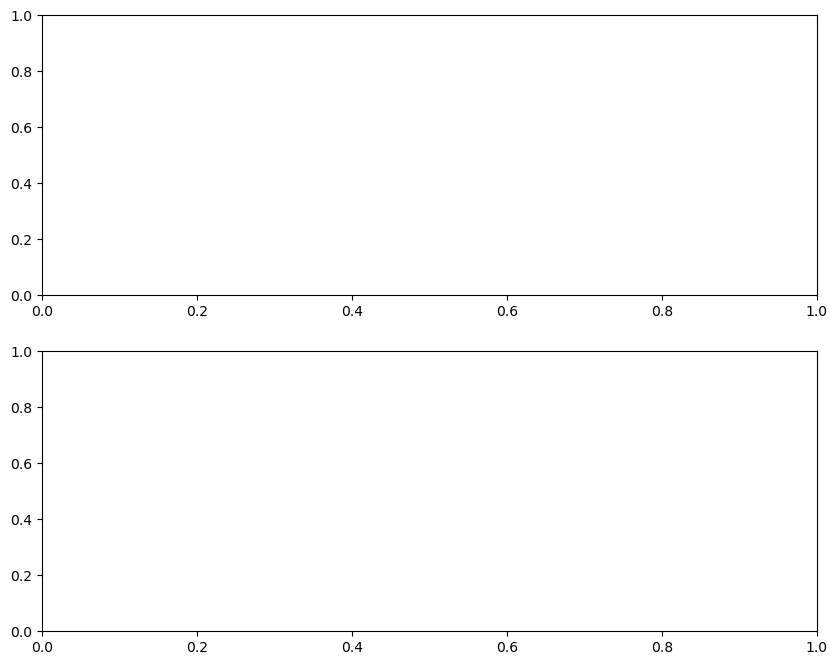

In [36]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the 'ensemble' and 'results_df' from your previous code

# Create subplots for accuracy and MCC
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Initialize lists to store accuracy and MCC values for each cluster
cluster_accuracies = []
cluster_mccs = []

# Analyze and explore collaboration clusters
for cluster_id in range(5):  # Assuming 5 clusters
    cluster_nodes = [node for node, label in zip(collaboration_graph.nodes, collaboration_labels) if label == cluster_id]
    cluster_subgraph = collaboration_graph.subgraph(cluster_nodes)

    # Extract features for nodes in the cluster (similar to what you did before)
    # features = ...

    # Split your data into training and testing sets (X_train, X_test, y_train, y_test)
    # Ensure that you have X_train, X_test, y_train, and y_test defined here.
    # Extract features for nodes in the cluster (similar to what you did before)
    
    # Split your data into training and testing sets (X_train, X_test, y_train, y_test)
    # Assuming you have a target variable 'y' for each graph
    X_collaboration_train, X_collaboration_test, y_collaboration_train, y_collaboration_test = train_test_split(collaboration_features, collaboration_labels, test_size=0.2, random_state=42)

    # Initialize a voting classifier with your ensemble of models
    ensemble = VotingClassifier(estimators=ensemble_models, voting='hard')

    # Train the ensemble model on the training data
    ensemble.fit(X_collaboration_train, y_collaboration_train)

    # Make predictions on the test set
    y_pred = ensemble.predict(X_collaboration_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_collaboration_test, y_pred)
    mcc = matthews_corrcoef(y_collaboration_test, y_pred)

    # Store accuracy and MCC values for this cluster
    cluster_accuracies.append(accuracy)
    cluster_mccs.append(mcc)

    # Visualize the cluster subgraph
    pos = nx.spring_layout(cluster_subgraph, seed=42)
    nx.draw(cluster_subgraph, pos=pos, with_labels=True)
    plt.title(f"Collaboration Cluster {cluster_id}")
    plt.show()

# Plot accuracy values
axes[0].bar(range(5), cluster_accuracies, tick_label=[f'Cluster {i}' for i in range(5)])
axes[0].set_title('Accuracy for Collaboration Clusters')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Accuracy')

# Plot MCC values
axes[1].bar(range(5), cluster_mccs, tick_label=[f'Cluster {i}' for i in range(5)], color='orange')
axes[1].set_title('MCC for Collaboration Clusters')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('MCC')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


The line initializes a voting classifier using the `VotingClassifier` class from scikit-learn. A voting classifier is a type of ensemble learning method where multiple machine learning models (classifiers) are combined to make predictions. In your code, you are creating an ensemble of models and using them for a majority vote to make predictions. Here's what this specific line of code does:

```python
ensemble = VotingClassifier(estimators=ensemble_models, voting='hard')
```

- `ensemble_models` is a list of tuples, where each tuple contains a string identifier for a classifier and the corresponding classifier object. These classifiers are the individual models that we want to combine for the ensemble.

- `voting='hard'` specifies that we want to use a "hard" voting strategy. In hard voting, each classifier in the ensemble predicts a class label, and the class label that receives the majority of votes is the final prediction. In other words, the class with the most votes from the individual classifiers is chosen as the ensemble's prediction.

After initializing the `VotingClassifier` object, we can proceed to train this ensemble on our training data and use it to make predictions. The ensemble will aggregate the predictions from its constituent models and provide a final prediction based on majority voting. This can often result in improved predictive performance compared to using individual models.

# We repeat the same process for communication clusters


C:\Users\khaou\AppData\Local\Temp\ipykernel_25196\1874919953.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Cluster': cluster_id, 'Classifier': 'Ensemble', 'Accuracy': accuracy, 'MCC': mcc}, ignore_index=True)
C:\Users\khaou\AppData\Local\Temp\ipykernel_25196\1874919953.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Cluster': cluster_id, 'Classifier': 'Ensemble', 'Accuracy': accuracy, 'MCC': mcc}, ignore_index=True)
C:\Users\khaou\AppData\Local\Temp\ipykernel_25196\1874919953.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Cluster': cluster_id, 'Classifier': 'Ensemble', 'Accuracy': accuracy, 'MCC': mcc}, ignor

  Cluster Classifier  Accuracy  MCC
0       0   Ensemble       1.0  1.0
1       1   Ensemble       1.0  1.0
2       2   Ensemble       1.0  1.0
3       3   Ensemble       1.0  1.0
4       4   Ensemble       1.0  1.0
5       0   Ensemble       1.0  1.0
6       1   Ensemble       1.0  1.0
7       2   Ensemble       1.0  1.0
8       3   Ensemble       1.0  1.0
9       4   Ensemble       1.0  1.0


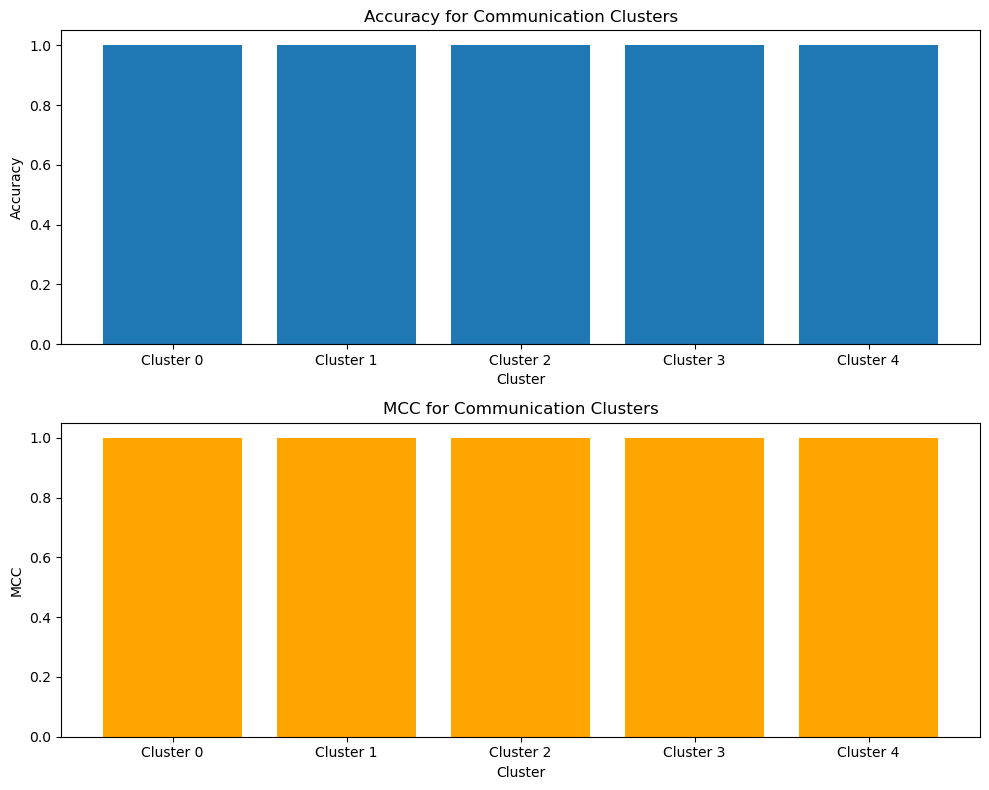

In [37]:
# Analyze and explore communication clusters
for cluster_id in range(5):  # Assuming 5 clusters
    cluster_nodes = [node for node, label in zip(communication_graph.nodes, communication_labels) if label == cluster_id]
    cluster_subgraph = communication_graph.subgraph(cluster_nodes)


   # X_collaboration_train, X_collaboration_test, y_collaboration_train, y_collaboration_test = train_test_split(collaboration_features, collaboration_labels, test_size=0.2, random_state=42)

    X_communication_train, X_communication_test, y_communication_train, y_communication_test = train_test_split(communication_features, communication_labels, test_size=0.2, random_state=42)

    # Initialize a voting classifier with your ensemble of models
    ensemble = VotingClassifier(estimators=ensemble_models, voting='hard')

    # Train the ensemble model on the training data
    ensemble.fit(X_communication_train, y_communication_train)

    # Make predictions on the test set
    y_pred = ensemble.predict(X_communication_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_communication_test, y_pred)
    mcc = matthews_corrcoef(y_communication_test, y_pred)

    # Store the results in the DataFrame
    results_df = results_df.append({'Cluster': cluster_id, 'Classifier': 'Ensemble', 'Accuracy': accuracy, 'MCC': mcc}, ignore_index=True)


# Print or analyze the results as needed
print(results_df)

# Create subplots for accuracy and MCC
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot accuracy values
axes[0].bar(range(5), accuracy, tick_label=[f'Cluster {i}' for i in range(5)])
axes[0].set_title('Accuracy for Communication Clusters')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Accuracy')

# Plot MCC values
axes[1].bar(range(5), mcc, tick_label=[f'Cluster {i}' for i in range(5)], color='orange')
axes[1].set_title('MCC for Communication Clusters')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('MCC')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()
